In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
energy_data=pd.read_csv('C:\\Users\HP\\Downloads\\hamoye\\dataset\\energydata_complete.csv')
energy_data.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


# Simple Linear Regression

In [31]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [33]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [35]:
df = df.rename(columns=column_names)

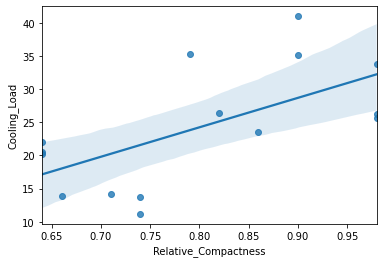

In [36]:
simple_linear_reg_df=df[['Relative_Compactness','Cooling_Load']].sample(15,random_state=3)
sns.regplot(x='Relative_Compactness',y='Cooling_Load',data=simple_linear_reg_df)

# MEASURING REGRESSION PERFORMANCE


# Mean absolute error

In [181]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']





AttributeError: 'MinMaxScaler' object has no attribute 'tranform'

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features_df , heating_target, test_size=0.3 ,random_state=1)



In [183]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
pred_values=linear_model.predict(x_test)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,pred_values)

In [184]:
round(mae,3)

0.063

# Residual sum of squared (Variance)

In [55]:
import numpy as np
rss=np.sum(np.square(y_test - pred_values))
round(rss,3)

1.827

# Root Mean squared error

In [58]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,pred_values))
round(rmse, 3)

0.089

# R-Squared 

Also known as the coefficient of determination, r-squared is a metric used in regression to determine the goodness of fit of the model. With values ranging from 0 to 1, It gives information on the percentage of the response variable  explained by the model. Mostly, the higher the value, the better the model however, this is not necessarily always true

In [59]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred_values)
round(r2_score,3)

0.893

# Penalization Methods

Regularization is a method used to make complex models simpler by penalising coefficients to reduce their magnitude, variance in the training set and in turn, reduce overfitting in the model.Regularization occurs by shrinking the coefficients in the model towards zero such that the complexity term added to the model will result in a bigger loss for models with a higher complexity . There are two types of regression techniques such as Ridge and Lasso regression.


# ridge regression

In [60]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.5)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.5)

In [62]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.001)

# comparing the effects of reguarlization

In [82]:
def get_weights_df(model,feat,col_name):
    weights=pd.Series(model.coef_,feat.columns).sort_values()
    weights_df=pd.DataFrame(weights).reset_index()
    weights_df.columns =['Features',col_name]
    weights_df[col_name].round(3)
    return weights_df



In [79]:
linear_model_weights=get_weights_df(linear_model,x_train,'Linear_Model_Weight')
ridge_weights_df= get_weights_df(ridge_reg,x_train,'Ridge_weight')
lasso_weights_df=get_weights_df(lasso_reg,x_train,'Lasso_weight')

In [80]:
final_weights=pd.merge(linear_model_weights,ridge_weights_df, on='Features')
final_weights=pd.merge(final_weights,lasso_weights_df, on='Features')

In [83]:
final_weights

,Features,Linear_Model_Weight,Ridge_weight,Lasso_weight
0,Surface_Area,-5.620066e+12,-0.062275,0.000000
1,Relative_Compactness,-5.855289e-01,-0.283471,-0.027719
2,Orientation,3.376007e-03,0.003369,0.000000
3,Glazing_Area_Distribution,2.662706e-02,0.029088,0.021431
4,Glazing_Area,2.148657e-01,0.212449,0.206132
5,Overall_Height,3.945312e-01,0.442467,0.463482
6,Wall_Area,3.278372e+12,0.103061,0.200087
7,Roof_Area,4.215050e+12,-0.163192,-0.000000


In [81]:
final_weights

,Features,Linear_Model_Weight,Ridge_weight,Lasso_weight
0,Surface_Area,-5.620066e+12,-0.062275,0.000000
1,Relative_Compactness,-5.855289e-01,-0.283471,-0.027719
2,Orientation,3.376007e-03,0.003369,0.000000
3,Glazing_Area_Distribution,2.662706e-02,0.029088,0.021431
4,Glazing_Area,2.148657e-01,0.212449,0.206132
5,Overall_Height,3.945312e-01,0.442467,0.463482
6,Wall_Area,3.278372e+12,0.103061,0.200087
7,Roof_Area,4.215050e+12,-0.163192,-0.000000


In [194]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings("ignore")


In [274]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  float64
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [195]:
energy_data=pd.read_csv('C:\\Users\HP\\Downloads\\hamoye\\dataset\\energydata_complete.csv')
energy_data.head(10)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [196]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [197]:
energy_data['date'] = ((pd.to_datetime(energy_data['date']).dt.dayofweek)// 5 == 1).astype(float)

energy_data['date'].value_counts()

0.0    14263
1.0     5472
Name: date, dtype: int64

In [198]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  float64
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# METHOD 1

In [199]:
energy_data.describe()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.277274,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,0.447664,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,0.000000,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,0.000000,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,0.000000,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,1.000000,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1.000000,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [289]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(energy_data), columns=energy_data.columns)
feature_var = normalised_df.drop(columns=['date', 'lights','Appliances'])
target_var = normalised_df['Appliances']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature_var,target_var, test_size=0.3 ,random_state=42)



In [231]:
x_train.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,...,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000
mean,0.517082,0.364469,0.308252,0.561569,0.420907,0.489892,0.517849,0.485990,0.407499,0.317816,...,0.478366,0.513476,0.398946,0.610243,0.734512,0.288130,0.574293,0.469241,0.500835,0.500835
std,0.169932,0.109196,0.159527,0.114502,0.166506,0.151954,0.184252,0.184857,0.176521,0.135747,...,0.210115,0.171973,0.171186,0.171314,0.196124,0.174402,0.182236,0.190095,0.290283,0.290283
min,0.000000,0.000000,0.000000,0.003749,0.000000,0.000000,0.000000,0.032620,0.000000,0.005288,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000164,0.000164
25%,0.419219,0.284561,0.195542,0.490299,0.298272,0.380122,0.399399,0.337825,0.282848,0.234701,...,0.323621,0.387555,0.277599,0.502713,0.609649,0.142857,0.430769,0.339367,0.249367,0.249367
50%,0.507920,0.347858,0.283499,0.563408,0.407112,0.457704,0.495495,0.461090,0.387960,0.289378,...,0.468262,0.486893,0.382637,0.623256,0.789474,0.261905,0.600000,0.454751,0.499397,0.499397
75%,0.613516,0.442024,0.392537,0.641860,0.505982,0.607571,0.630631,0.619007,0.503583,0.358868,...,0.594173,0.629001,0.495177,0.736047,0.890351,0.392857,0.600000,0.597285,0.753305,0.753305
max,1.000000,0.836620,1.000000,0.964570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.999612,1.000000,1.000000,1.000000,0.995475,1.000000,1.000000


In [232]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
pred_values=linear_model.predict(x_test)

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,pred_values)
round(mae,3)

0.05

In [233]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
pred_values=linear_model.predict(x_test)
pred_values

array([0.03321698, 0.24412523, 0.03406852, ..., 0.06841375, 0.10031112,
       0.05725617])

Residual sum of squared (variance)

In [240]:
import numpy as np
rss=np.sum(np.square(y_test - pred_values))
round(rss,3)

42.334

Root mean squared error

In [235]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,pred_values))
round(rmse, 3)

0.088

r-squared

In [238]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred_values)
round(r2_score,3)

0.149

In [221]:
col_temp=['T1','T2','T3','T4','T5','T6','T7','T8','T9']
col_hum=["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"] 
col_light = ["lights"]
col_randoms = ["rv1", "rv2"]
col_target = ["Appliances"]
feature_vars = energy_data[col_temp + col_hum + col_weather + col_randoms ]
target_vars = energy_data[col_target]



In [243]:
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

Percentage of the appliance consumption is less than 200 Wh
Appliances    90.291361
dtype: float64


In [241]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.5)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.5)

In [244]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.001)

Effect of regularization

In [258]:
def get_weights_df(model,feat,col_name):
    weights=pd.Series(model.coef_,feat.columns).sort_values()
    weights_df=pd.DataFrame(weights).reset_index()
    weights_df.columns =['Features',col_name]
    weights_df[col_name].round(3)
    return weights_df


In [259]:
linear_model_weights=get_weights_df(linear_model,x_train,'Linear_Model_Weight')
ridge_weights_df= get_weights_df(ridge_reg,x_train,'Ridge_weight')
lasso_weights_df=get_weights_df(lasso_reg,x_train,'Lasso_weight')

In [260]:
final_weights=pd.merge(linear_model_weights,ridge_weights_df, on='Features')
final_weights=pd.merge(final_weights,lasso_weights_df, on='Features')

In [261]:
final_weights

,Features,Linear_Model_Weight,Ridge_weight,Lasso_weight
0,rv2,-6.347156e+10,0.000743,-0.000000
1,RH_2,-4.566222e-01,-0.401134,-0.000000
2,T_out,-3.218423e-01,-0.250765,0.000000
3,T2,-2.361131e-01,-0.193880,0.000000
4,T9,-1.899177e-01,-0.188584,-0.000000
5,RH_8,-1.575747e-01,-0.156596,-0.000110
6,RH_out,-7.767868e-02,-0.050541,-0.049557
7,RH_7,-4.462568e-02,-0.046291,-0.000000
8,RH_9,-3.980029e-02,-0.041701,-0.000000
9,T5,-1.566246e-02,-0.020727,-0.000000


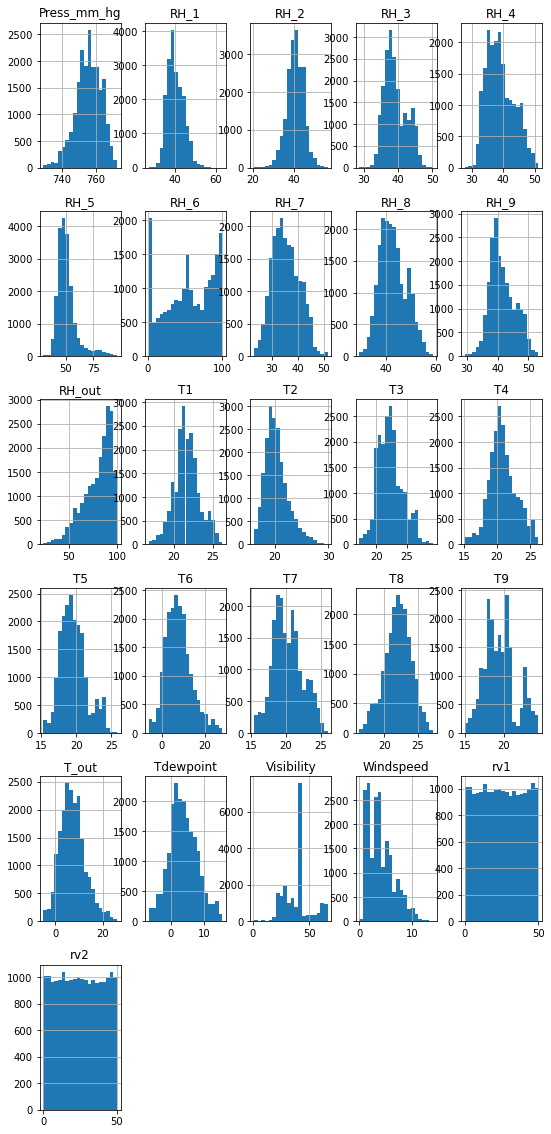

In [272]:
feature_vars.hist(bins = 20 , figsize= (9,20)) ;



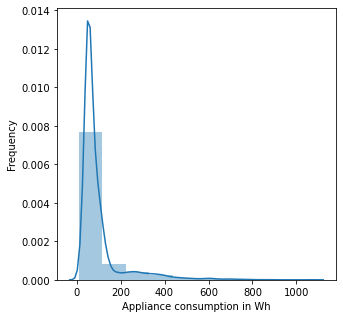

In [268]:
f = plt.figure(figsize=(5,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;



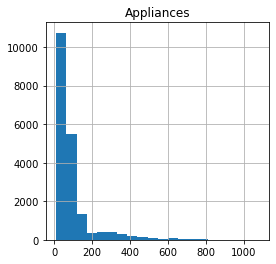

In [267]:
target_vars.hist(bins = 20 , figsize= (4,4)) ;

# Quiz

1)

In [310]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(energy_data), columns=energy_data.columns)
inside = normalised_df['T2']
outside = normalised_df['T6']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inside,outside, test_size=0.3 ,random_state=42)



In [312]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
pred_values=linear_model.predict(x_test)



ValueError: Expected 2D array, got 1D array instead:
array=[0.22534529 0.22534529 0.22534529 ... 0.69265118 0.67705355 0.66617051].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [314]:
from sklearn.metrics import r2_score
r2_score=r2_score(pred_values,y_test)
round(r2_score,2)

-93.83

2)train_X = train[feature_vars[.columns]
train_y = train[target_vars.columns]

In [295]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(inside,outside)
round(mae,2)

0.12

3)

In [305]:
import numpy as np
rss=np.sum(np.square(inside - outside))
round(rss,2)

419.55

4)

0.15

5)

6)

7)

8)

9)

10)

11)

12)

13)

14)

15)

16)

17)

18)

19)

20)